In [1]:
!pip install memory_profiler

You should consider upgrading via the 'c:\users\hys\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
%load_ext memory_profiler

In [3]:
%memit

peak memory: 51.52 MiB, increment: 0.19 MiB


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys

pd.options.display.float_format = '{:.3f}'.format

In [2]:
df = pd.read_csv('train.csv')
df.head(20)

import sklearn
df=sklearn.utils.shuffle(df)

In [3]:
df = df.iloc[:1000000,:]
df

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
190385,30,0.118,-0.015,-0.017,-0.009,-0.051,-0.089,-1,-3.172,-3.093,...,4.676,8.243,3.081,8.731,4.693,10.621,3.624,8.899,2.862,190385
1332432,283,0.721,0.001,0.001,0.001,0.000,-0.001,1,-0.697,0.014,...,0.213,-0.827,-0.896,-0.547,-0.517,-1.156,-1.088,-0.995,-0.937,1332432
185082,29,0.597,0.004,0.010,0.019,0.016,0.015,-1,1.353,0.077,...,-0.282,1.949,-1.652,2.883,-0.832,3.385,-1.155,1.642,-1.975,185082
2041405,434,2.933,0.002,0.002,0.007,0.013,0.009,-1,-0.674,0.588,...,-1.599,-2.638,-1.890,-1.772,-2.038,-3.512,-1.846,-3.259,-1.857,2041405
2180910,460,0.000,-0.002,-0.002,0.013,0.015,0.003,-1,-1.290,-0.743,...,-2.773,-2.004,-1.308,-1.855,-2.904,-3.433,-2.174,-3.054,-2.007,2180910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062424,438,0.615,-0.001,-0.002,-0.002,-0.001,-0.001,-1,-0.324,-0.016,...,1.847,2.044,3.072,0.781,1.817,1.407,1.699,1.847,2.328,2062424
38621,5,0.846,0.004,0.006,0.008,0.002,0.000,1,0.990,1.206,...,2.306,0.576,1.316,0.538,2.194,0.707,1.491,0.675,1.329,38621
1408572,300,0.000,0.013,0.013,0.018,0.032,0.024,1,4.140,6.200,...,-2.037,14.350,18.989,-0.003,-1.555,1.514,1.050,6.517,7.250,1408572
1154715,244,0.066,-0.004,-0.005,-0.008,-0.005,0.008,-1,1.948,-0.281,...,-1.666,1.341,-1.889,1.857,-1.831,2.187,-1.679,1.440,-1.862,1154715


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 190385 to 78925
Columns: 138 entries, date to ts_id
dtypes: float64(135), int64(3)
memory usage: 1.0 GB


In [5]:
columns = df.columns
target = ['resp_1', 'resp_2', 'resp_3', 'resp_4', 'resp']
columns

Index(['date', 'weight', 'resp_1', 'resp_2', 'resp_3', 'resp_4', 'resp',
       'feature_0', 'feature_1', 'feature_2',
       ...
       'feature_121', 'feature_122', 'feature_123', 'feature_124',
       'feature_125', 'feature_126', 'feature_127', 'feature_128',
       'feature_129', 'ts_id'],
      dtype='object', length=138)

In [10]:
def target_normalize(target):
    for x in target:
        df[x] = df[x].map(np.log1p)

target_normalize(target)
df[target]

,resp_1,resp_2,resp_3,resp_4,resp
192346,0.002,0.002,0.006,0.008,0.005
2070950,-0.000,-0.001,0.009,0.008,0.001
532407,-0.002,-0.003,-0.002,0.003,0.001
1308938,0.001,0.003,0.006,0.011,0.010
33626,-0.016,-0.023,-0.021,0.083,0.076
...,...,...,...,...,...
1103814,0.003,0.000,-0.003,-0.008,-0.007
62429,-0.011,-0.031,-0.033,0.020,-0.001
231161,-0.001,-0.002,-0.005,-0.002,-0.002
2046028,-0.001,-0.002,-0.001,-0.008,-0.010


In [6]:
df[['ts_id']]

,ts_id
190385,190385
1332432,1332432
185082,185082
2041405,2041405
2180910,2180910
...,...
2062424,2062424
38621,38621
1408572,1408572
1154715,1154715


In [7]:
df = df[df['weight'] > 0]
df.shape

(829251, 138)

In [8]:
df['action'] = df['resp'].apply(lambda x:x>0).astype(int)

<ipython-input-8-c17da4b705e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['action'] = df['resp'].apply(lambda x:x>0).astype(int)


In [9]:
df[['action']]

,action
190385,0
1332432,0
185082,1
2041405,1
1493779,0
...,...
354959,1
2271857,0
2062424,0
38621,1


In [10]:
features = [col for col in list(df.columns) if 'feature' in col]

def df_fill(features):
    for x in features:
        df[x] = df[x].fillna(df[x].median())

df_fill(features)
df[features]

<ipython-input-10-ea7ce762a79e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x] = df[x].fillna(df[x].median())


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129
190385,-1,-3.172,-3.093,-1.755,-1.009,-2.935,-1.874,0.014,0.004,-10.937,...,9.339,4.676,8.243,3.081,8.731,4.693,10.621,3.624,8.899,2.862
1332432,1,-0.697,0.014,0.215,0.326,0.991,1.505,-0.214,-0.183,-0.662,...,-0.438,0.213,-0.827,-0.896,-0.547,-0.517,-1.156,-1.088,-0.995,-0.937
185082,-1,1.353,0.077,-1.107,-0.603,-1.402,-0.810,-1.514,-1.248,1.861,...,3.448,-0.282,1.949,-1.652,2.883,-0.832,3.385,-1.155,1.642,-1.975
2041405,-1,-0.674,0.588,-0.190,-0.272,0.102,0.225,-0.667,-1.092,-1.462,...,-1.918,-1.599,-2.638,-1.890,-1.772,-2.038,-3.512,-1.846,-3.259,-1.857
1493779,1,-3.172,-3.093,-0.846,-0.928,0.092,0.110,-0.015,0.031,0.125,...,0.867,1.505,0.876,0.846,0.592,1.002,0.914,0.738,0.918,0.725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354959,-1,-0.186,0.141,-6.825,-8.805,-5.238,-6.429,1.334,2.002,-0.145,...,-1.068,-0.604,-1.264,-0.832,-0.931,-0.602,-1.385,-0.272,-1.086,0.004
2271857,-1,-0.144,0.486,-0.663,-0.792,0.069,0.098,-0.060,0.017,-0.058,...,-0.580,-0.124,-0.774,-0.611,-0.693,-1.025,-1.118,-0.889,-0.923,-0.620
2062424,-1,-0.324,-0.016,-0.694,-0.737,-0.685,-0.778,-0.434,-0.525,0.515,...,0.884,1.847,2.044,3.072,0.781,1.817,1.407,1.699,1.847,2.328
38621,1,0.990,1.206,3.036,3.330,2.481,2.700,0.014,0.004,-0.233,...,0.660,2.306,0.576,1.316,0.538,2.194,0.707,1.491,0.675,1.329


In [11]:
df.isnull().sum().sum(), df.isna().sum().sum()

(0, 0)

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9)
pca.fit(df[features])

print('Variance :', pca.n_components)
print('No. of components to keep :', pca.n_components_)

Variance : 0.9
No. of components to keep : 22


In [13]:
columns = df.columns[0:7]

columns_for_pca = features
columns_for_pca

['feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15',
 'feature_16',
 'feature_17',
 'feature_18',
 'feature_19',
 'feature_20',
 'feature_21',
 'feature_22',
 'feature_23',
 'feature_24',
 'feature_25',
 'feature_26',
 'feature_27',
 'feature_28',
 'feature_29',
 'feature_30',
 'feature_31',
 'feature_32',
 'feature_33',
 'feature_34',
 'feature_35',
 'feature_36',
 'feature_37',
 'feature_38',
 'feature_39',
 'feature_40',
 'feature_41',
 'feature_42',
 'feature_43',
 'feature_44',
 'feature_45',
 'feature_46',
 'feature_47',
 'feature_48',
 'feature_49',
 'feature_50',
 'feature_51',
 'feature_52',
 'feature_53',
 'feature_54',
 'feature_55',
 'feature_56',
 'feature_57',
 'feature_58',
 'feature_59',
 'feature_60',
 'feature_61',
 'feature_62',
 'feature_63',
 'feature_64',
 'feature_65',
 'feature_66',
 'fea

In [14]:
def transform_with_pca(pca, df, columns):
    transformed_data = pca.transform(df[columns])
    
    tcols = []
    for i in range(pca.n_components_):
        tcols.append('component_' + str(i))
    
    print('component: ', tcols)
    df_transformed = pd.DataFrame(transformed_data, columns=tcols)
    
    for col in df_transformed.columns:
        df[col] = df_transformed[col]
        
    df.drop(columns, inplace=True, axis = 1)
    
    return tcols

In [15]:
new_cols = transform_with_pca(pca, df, columns_for_pca)
#transform_with_pca(pca, df_test, columns_for_pca)

component:  ['component_0', 'component_1', 'component_2', 'component_3', 'component_4', 'component_5', 'component_6', 'component_7', 'component_8', 'component_9', 'component_10', 'component_11', 'component_12', 'component_13', 'component_14', 'component_15', 'component_16', 'component_17', 'component_18', 'component_19', 'component_20', 'component_21']


<ipython-input-14-5e9187ece29e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df_transformed[col]
C:\Users\HYS\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [16]:
columns = ['date', 'weight', 'resp_1', 'resp_2', 'resp_3', 'resp_4', 'resp']
columns

['date', 'weight', 'resp_1', 'resp_2', 'resp_3', 'resp_4', 'resp']

In [17]:
for col in new_cols:
    columns.append(col)

In [18]:
columns = ['resp_1', 'resp_2', 'resp_3', 'resp_4', 'resp', 'weight'] + new_cols

In [19]:
columns

['resp_1',
 'resp_2',
 'resp_3',
 'resp_4',
 'resp',
 'weight',
 'component_0',
 'component_1',
 'component_2',
 'component_3',
 'component_4',
 'component_5',
 'component_6',
 'component_7',
 'component_8',
 'component_9',
 'component_10',
 'component_11',
 'component_12',
 'component_13',
 'component_14',
 'component_15',
 'component_16',
 'component_17',
 'component_18',
 'component_19',
 'component_20',
 'component_21']

In [23]:
X_columns = ['weight', 'component_0', 'component_1', 'component_2', 'component_3', 'component_4',
 'component_5', 'component_6', 'component_7', 'component_8', 'component_9', 'component_10',
 'component_11', 'component_12', 'component_13', 'component_14', 'component_15', 'component_16',
 'component_17', 'component_18', 'component_19', 'component_20', 'component_21']

In [21]:
df = df.iloc[:,1:]

In [24]:
y = df['resp']
X = df[X_columns]

def missing_value(df):
    for x in X_columns:
        df[x] = df[x].fillna(df[x].median())

        
missing_value(df)
df.isnull().sum().sum()

0

In [25]:
df.isnull().sum().sum()

0

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state=1)

y_train.values.ravel()
y_val.values.ravel()

array([ 0.00144189, -0.01475135,  0.01303163, ..., -0.00085745,
        0.04602317, -0.02905202])

In [31]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)

# from sklearn.decomposition import PCA
# pca = PCA()
# comp = pca.fit(X_train)

# import seaborn as sns
# plt.plot(np.cumsum(comp.explained_variance_ratio_))
# plt.grid()
# plt.xlabel('Number of Principal Components')
# plt.ylabel('Explained Variance')
# sns.despine();

In [32]:
# pca = PCA(n_components=50).fit(X_train)
# X_train_transform = pca.transform(X_train)

# X_val_transform = pca.transform(scaler.transform(X_val))
# X_train_transform

In [28]:
import xgboost as xgb
evals_result = {}
model_xgb = xgb.XGBRegressor(max_depth=3, eta=0.1, subsample=0.7, num_round=150, n_estimators=150, evals_result=evals_result)
model_xgb.fit(X_train, y_train)
print(model_xgb.score(X_train, y_train))

[23:42:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { evals_result, num_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.003867982123891278


In [29]:
model_xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.1, evals_result={},
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.100000001,
             max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=0,
             num_parallel_tree=1, num_round=150, random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [30]:
model_xgb.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_val, y_val)])

[23:43:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { evals_result, num_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-rmse:0.45043	validation_1-rmse:0.45047
[1]	validation_0-rmse:0.40557	validation_1-rmse:0.40561
[2]	validation_0-rmse:0.36521	validation_1-rmse:0.36526
[3]	validation_0-rmse:0.32892	validation_1-rmse:0.32896
[4]	validation_0-rmse:0.29628	validation_1-rmse:0.29633
[5]	validation_0-rmse:0.26694	validation_1-rmse:0.26698
[6]	validation_0-rmse:0.24055	validation_1-rmse:0.24060
[7]	validation_0-rmse:0.21685	validation_1-rmse:0.21689
[8]	validation_0-rmse:0.19555	validation_1-rmse:0.19559
[9]	validation_0-rmse:0.17642	validation_1-rmse:0.17647
[10]	validation_0-rmse:0.15925	validati

[137]	validation_0-rmse:0.02810	validation_1-rmse:0.02817
[138]	validation_0-rmse:0.02810	validation_1-rmse:0.02817
[139]	validation_0-rmse:0.02810	validation_1-rmse:0.02817
[140]	validation_0-rmse:0.02810	validation_1-rmse:0.02817
[141]	validation_0-rmse:0.02810	validation_1-rmse:0.02817
[142]	validation_0-rmse:0.02810	validation_1-rmse:0.02817
[143]	validation_0-rmse:0.02810	validation_1-rmse:0.02817
[144]	validation_0-rmse:0.02810	validation_1-rmse:0.02817
[145]	validation_0-rmse:0.02810	validation_1-rmse:0.02817
[146]	validation_0-rmse:0.02810	validation_1-rmse:0.02817
[147]	validation_0-rmse:0.02810	validation_1-rmse:0.02817
[148]	validation_0-rmse:0.02810	validation_1-rmse:0.02817
[149]	validation_0-rmse:0.02810	validation_1-rmse:0.02817


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.1, evals_result={},
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.100000001,
             max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=0,
             num_parallel_tree=1, num_round=150, random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
eval_result = model_xgb.evals_result()
training_rounds = range(len(eval_result['validation_0']['rmse']))

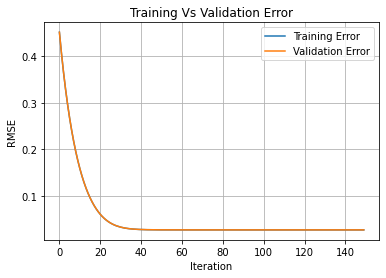

In [32]:
plt.plot(training_rounds,eval_result['validation_0']['rmse'],label='Training Error')
plt.plot(training_rounds,eval_result['validation_1']['rmse'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()

In [33]:
result = model_xgb.predict(X_val)
result[:5]

array([ 0.0004085 ,  0.00056356,  0.00057721,  0.00068802, -0.00021154],
      dtype=float32)

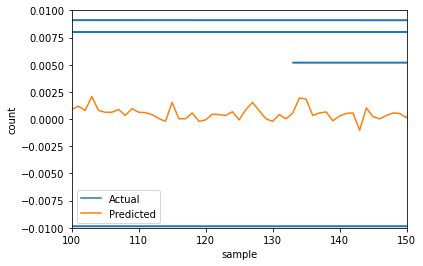

In [38]:
plt.plot(y_val, label='Actual')
plt.plot(result, label='Predicted')
plt.xlabel('sample')
plt.ylabel('count')
plt.xlim([100,150])
plt.ylim([-0.01, 0.01])
plt.legend()
plt.show()